<a href="https://colab.research.google.com/github/michaelchapa/dataMining_data_normalization/blob/master/finalOutput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h4>Develop a program for the pre-processing data.</h4>
<ol>
  <li>Read data from the provided CSV file into a DataFrame</li>
  <li>Data-file has 6 columns: A, B, C, D, E, F</li>
  <li>A & B are categorical and the rest are numeric</li>
</ol>


In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn import preprocessing
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/michaelchapa/' \
                   'dataMining_data_normalization/master/hwk01.csv')

<h2>Data Statistics</h2>
<h3>Write functions to calculate columns C, D, E, F</h3>
<ol>
  <li>Mean & Midrange</li>
  <li>Mode & Modality (i.e., bimodal, trimodal, etc.)</li>
  <li>Five-number summary</li>
  <li>Compare to the corresponding functions provided by DataFrame</li>
</ol>

In [32]:
def getMean(data):
    rows, _ = data.shape
    data = data[data.columns[3:]].sum(axis = 0)
    data = data / rows
    
    print(data)


def getMidRange(data):
    rows, _ = data.shape
    midranges = []
    attributes = list(data.columns[3:])
    
    for attribute in attributes:
        data.sort_values(by = attribute, inplace = True)
        midranges.append(data.loc[(rows // 2), attribute])
    
    print(midranges)

    
def getMode(data):
    for attribute in ['C', 'D', 'E', 'F']:
        print(data[attribute].value_counts(), '\n')
        
    # print("Attribute C is Bimodal")
    # print("Attributes D and E have no Mode")
    # print("Attribute F is Unimodal")
        

# For each column get Minimum, Maximum, Standard Deviation, Mean and Median
def getFiveSummary(data):
    data = data[data.columns[3:]]
    
    print('Minimum:')
    print(data.apply(np.min, axis = 0, raw = True), end='\n\n')
    print('Maximum:')
    print(data.apply(np.max, axis = 0, raw = True), end='\n\n')
    print('Standard Deviation:')
    print(data.apply(np.std, axis = 0, raw = True), end='\n\n')
    print('Mean:')
    print(data.apply(np.mean, axis = 0, raw = True), end='\n\n')
    print('Median:')
    print(data.apply(np.median, axis = 0, raw = True), end='\n\n')
    
def getCentralTendencySummary(data):
    numericAttributes = data[data.columns[3:]]
    
    print("Mode:\n", numericAttributes.mode(), "\n")
    print("Minimum:\n", numericAttributes.min(), "\n")
    print("Maximum:\n", numericAttributes.max(), "\n")
    print("Standard Deviation:\n", numericAttributes.std(), "\n")
    print("Mean:\n", numericAttributes.mean(), "\n")
    print("Median:\n", numericAttributes.median(), "\n")
    
    print("DataFrame.describe() output:\n",numericAttributes.describe(), "\n")
    
    # Normalized boxplot of the data. Mean zero.
    x = numericAttributes.values # returns numpy array
    scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
    xScaled = scaler.fit_transform(x) # returns DataFrame
    numericAttributes = pd.DataFrame(xScaled, columns = ['C', 'D', 'E', 'F'])
    numericAttributes.boxplot()

<h3>Mean:</h3>

In [ ]:
getMean(data)

C    5184.663000
D      -0.034769
E      15.456746
F       5.920000
dtype: float64


<h3>Mid-Range:</h3>
<p>For columns [C, D, E, F]</p>

In [ ]:
getMidRange(data)

[2449, 2.044771341461609, 23.713011359338232, 9]


<h3>Mode & Modality (i.e., bimodal, trimodal, etc.)</h3>
<p>My function will take a an attribute and count every instance of a number. Finally it will rank the Mode with the highest count. Results displayed below show the left column as Mode digit and right column as number of instances of that digit.</p>
<table>
<tr><th>Attribute</th><th>Modality</th></tr>
<tr><td>C</td><td>Bimodal</td></tr>
<tr><td>D</td><td>No Mode</td></tr>
<tr><td>E</td><td>No Mode</td></tr>
<tr><td>F</td><td>Unimodal</td></tr>
</table>

In [ ]:
getMode(data)

6930    3
589     3
9904    2
4818    2
6208    2
       ..
7492    1
3392    1
7486    1
5437    1
4098    1
Name: C, Length: 956, dtype: int64 

-0.722061    1
 0.325066    1
 1.393980    1
-0.008851    1
-1.897452    1
            ..
-0.121724    1
 0.347324    1
 1.826622    1
 1.302756    1
-1.525935    1
Name: D, Length: 1000, dtype: int64 

17.662165    1
5.986575     1
0.817117     1
22.749373    1
14.209222    1
            ..
24.035987    1
17.571367    1
27.323796    1
22.529632    1
17.896387    1
Name: E, Length: 1000, dtype: int64 

6     110
4     100
3      98
1      94
9      93
7      89
11     85
10     85
5      85
2      81
8      80
Name: F, dtype: int64 



<h3>Five-number summary</h3>
<p>Calculated using DataFrame.apply() and Numpy functions.</p>

In [ ]:
getFiveSummary(data)

Minimum:
C    78.000000
D    -3.298415
E   -16.495096
F     1.000000
dtype: float64

Maximum:
C    9996.000000
D       3.270827
E      54.706505
F      11.000000
dtype: float64

Standard Deviation:
C    2852.671639
D       1.001087
E      10.045413
F       3.120513
dtype: float64

Mean:
C    5184.663000
D      -0.034769
E      15.456746
F       5.920000
dtype: float64

Median:
C    5180.000000
D      -0.045414
E      15.441078
F       6.000000
dtype: float64



<h3>Compare to the corresponding functions provided by DataFrame</h3>
<p>The DataFrame methods made calculating the measures of Central Tendency much easier.</p>
<p>There is also a nice function called DataFrame.describe() which will provide the same summary information.</p>
<p>I've also provided a boxplot after the data was normalized, it's a nice native function to DataFrame and looks good.</p>
<h3>Analysis of my functions against the built-in ones</h3>
<p><code>DataFrame.Mode</code> doesn't have very pretty output, it ranks the values but isn't very clear of each attribute's Modality. The results are pretty similar to the ones I calculated in the previous section.</p>
<p>There wasn't a Midrange function built into <code>DataFrame</code></p>
<p>All other functions were easy to use and provided information similar to mine.</p>
<p>Reviewing the Central Tendency and my boxplot of the attributes, I think the data is well distributed in columns <em>C</em> and <em>F</em>.
<p>The attributes <em>D</em> and <em>E</em> have outliers plotted individually, indicating the values are less than <code>1.5 * IQR (Interquartile Range)</code>. The whiskers terminate at the most extreme observations occuring within <code>1.5 * IQR</code> of the quartiles.</p>

Mode:
           C         D          E    F
0     589.0 -3.298415 -16.495096  6.0
1    6930.0 -2.944310 -16.414142  NaN
2       NaN -2.812992 -12.794588  NaN
3       NaN -2.779496 -11.365322  NaN
4       NaN -2.774320 -10.614808  NaN
..      ...       ...        ...  ...
995     NaN  2.613627  40.550804  NaN
996     NaN  2.805919  43.249739  NaN
997     NaN  3.093815  43.433919  NaN
998     NaN  3.228720  44.308779  NaN
999     NaN  3.270827  54.706505  NaN

[1000 rows x 4 columns] 

Minimum:
 C    78.000000
D    -3.298415
E   -16.495096
F     1.000000
dtype: float64 

Maximum:
 C    9996.000000
D       3.270827
E      54.706505
F      11.000000
dtype: float64 

Standard Deviation:
 C    2854.099045
D       1.001588
E      10.050440
F       3.122074
dtype: float64 

Mean:
 C    5184.663000
D      -0.034769
E      15.456746
F       5.920000
dtype: float64 

Median:
 C    5180.000000
D      -0.045414
E      15.441078
F       6.000000
dtype: float64 

DataFrame.describe() output:
       

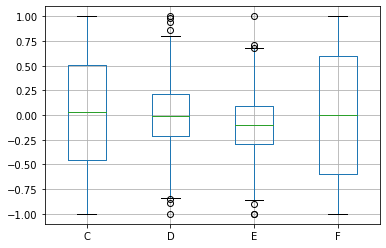

In [34]:
getCentralTendencySummary(data)

<h2>Similarity & Distance</h2>
<h3>Prompt the user for a tuple, p = (a1, b2, 515, -0.876, 6.4253, 45)</h3>
<h4>Using the set of columns C, D, E, F: Print row in DataFrame that is LEAST dissimilar to 'p'</h4>
<ol>
  <li>Euclidian distance</li>
  <li>Manhattan distance</li>
  <li>Supremum distance</li>
  <li>Cosine similarity</li>
</ol>

<h3>Normalize the data points by making the norm of each data point (under columns C, D, E, F) equal to 1. </h3>
<h3>Scale the values in columns C, D, E, F; so that for each row (C, D, E, F) we have: sqrt(C^2 + D^2 + E^2 + F^2) = 1.</h3>
<h3>Print the row in the DataFrame that has the shortest Euclidiean distances from the normalized point 'p'.</h3>

In [35]:
# Determine the Distance of each row compared to the user input 'p'
# Prints out the least distant row
def getDistances(data):
    pValues = input("input 4 values seperated by commas (,):").split(',')
    pValues = [float(i) for i in pValues] # convert String to Float d-type
    print() # for nice formatting :P
    
    data = data[data.columns[3:]].T # get columns and transpose
    
    instances = [(euclideanDistance, "Euclidean"), 
                 (manhattanDistance, "Manhattan"), 
                 (supremumDistance, "Supremum"), 
                 (cosineDistance, "Cosine")]
    
    # Raw Distances
    for instance in instances:
        distances = data.apply(\
            instance[0], result_type = 'reduce', args = (pValues))
        leastDistantIndex = np.argmin(distances) # returns index of row
        print("Least", instance[1], "Distant columns at row " \
              , str(leastDistantIndex))
        print(data[leastDistantIndex], '\n')
    
    # Normalize data and p-values
    data = data.T
    x = data.values # creates numpy array
    
    xScaled = preprocessing.normalize(x, norm= 'l1')
    pScaled = preprocessing.normalize([pValues], norm= 'l1')
    
    data = pd.DataFrame(xScaled, columns = ['C', 'D', 'E', 'F'])
    data = data.T
    
    pScaled = pScaled.flatten()
    pScaled = pScaled.tolist()
    
    # Normalized Distances
    print('\n\n' + ('*' * 16) + ' Normalized ' + ('*' * 8))
    print('input scaled: \n' + str(pScaled) + '\n')
    for instance in instances:
        distances = data.apply(\
            instance[0], result_type = 'reduce', args = (pScaled))
        leastDistantIndex = np.argmin(distances)
        print("Normalized Least", instance[1], "Distant columns at row " \
              , str(leastDistantIndex))
        print(data[leastDistantIndex], '\n')

    
def euclideanDistance(dataValues, c, d, e, f):
    return distance.euclidean(dataValues, [c, d, e, f])

# Also known as Cityblock distance
def manhattanDistance(dataValues, c, d, e, f):
    return distance.cityblock(dataValues, [c, d, e, f])

# Also known as Chebyshev distance
def supremumDistance(dataValues, c, d, e, f):
    return distance.chebyshev(dataValues, [c, d, e, f])
    
def cosineDistance(dataValues, c, d, e, f):
    return distance.cosine(dataValues, [c, d, e, f])

<h3>Calculating distances with and without Normalization</h3>
<p>My function <code>getDistances</code> makes calls to Distance functions after transforming the data</p>

In [36]:
getDistances(data)

input 4 values seperated by commas (,):9, 12, 0, 8

Least Euclidean Distant columns at row  687
C    6573.000000
D      -1.375692
E       7.752688
F       1.000000
Name: 687, dtype: float64 

Least Manhattan Distant columns at row  687
C    6573.000000
D      -1.375692
E       7.752688
F       1.000000
Name: 687, dtype: float64 

Least Supremum Distant columns at row  687
C    6573.000000
D      -1.375692
E       7.752688
F       1.000000
Name: 687, dtype: float64 

Least Cosine Distant columns at row  673
C    7140.000000
D      -1.707167
E      13.006209
F      11.000000
Name: 673, dtype: float64 



**************** Normalized ********
input scaled: 
[0.3103448275862069, 0.41379310344827586, 0.0, 0.27586206896551724]

Normalized Least Euclidean Distant columns at row  687
C    0.649834
D    0.003163
E    0.280353
F    0.066650
Name: 687, dtype: float64 

Normalized Least Manhattan Distant columns at row  687
C    0.649834
D    0.003163
E    0.280353
F    0.066650
Name: 687, dtype: f

<h3>Write functions to normalize the data in a given column using the
following methods. Apply these functions on column C.</h3>

In [37]:
# Scales the DataFrame into Real Numbers between 0 and 1.
# Input: DataFrame rows consisting of Numeric Attributes. 
# Output: Numeric feature, all instances normalized within [-1, 1] range.
def normalizeMinMax(data):
    data = data[data.columns[3:]]
    x = data.values # returns numpy array
    scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
    xScaled = scaler.fit_transform(x) # returns DataFrame
    data = pd.DataFrame(xScaled)
    print(data[0])


# Alternative is sklearn.preprocessing.scale()
def normalizeZScore(data):
    data = data[data.columns[3:]]
    powerTransformer = preprocessing.PowerTransformer(method = 'yeo-johnson')
    data = powerTransformer.fit_transform(data.values)
    data = pd.DataFrame(data)
    print(data[0])
    
    
def normalizeDecimalScale(data):
    data = data[data.columns[3:]]
    scaler = preprocessing.StandardScaler()
    data = scaler.fit_transform(data.values)
    data = pd.DataFrame(data)
    print(data[0])

<h3>Min-Max:</h3>

In [38]:
normalizeMinMax(data)

0     -0.834241
1     -0.862876
2      0.216374
3     -0.150232
4     -0.529946
         ...   
995    0.189353
996    0.975600
997   -0.766485
998   -0.293809
999    0.516435
Name: 0, Length: 1000, dtype: float64


<h3>Z-Score:</h3>

In [39]:
normalizeZScore(data)

0     -1.595176
1     -1.668067
2      0.379147
3     -0.229172
4     -0.929130
         ...   
995    0.335919
996    1.519984
997   -1.432470
998   -0.483171
999    0.845514
Name: 0, Length: 1000, dtype: float64


<h3>Decimal Scale:</h3>

In [40]:
normalizeDecimalScale(data)

0     -1.501983
1     -1.551760
2      0.324376
3     -0.312922
4     -0.973005
         ...   
995    0.277402
996    1.644191
997   -1.384198
998   -0.562512
999    0.845992
Name: 0, Length: 1000, dtype: float64


<h3></h3>